## 5. Advanced Pandas: Data Preparation and Cleaning

Before feeding data to a machine learning pipeline, We usually need to preprocess the data in a dataframe. Pandas provides some tools for such data prepratation procedure. The preprocessing in Pandas can include performing the following operations:

* Removing unneeded columns.
* Removing the duplicated applications.
* Renaming badly formatted column labels.
* Converting categorical fields into Pandas Category data type.
* Converting numerical fields into numeric values (from objects).
* Dealing with missing values (either removing or filling).

We are going to try these steps on the following dataset from Google Play store.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('googleplaystore_sample.csv', index_col=0)
df.head()

Like always, we first use the `info` and `describe` functions for early examination of the dataframe:

In [ ]:
df.info()

In [ ]:
df.describe()

### 5.1 Removing Surplus Columns

Let's say we want to remove the following columns from the dataframe: ```'Category'```, ```'Last Updated'```, ```'Current Ver'``` and ```'Android Ver'```. We can use the ```drop``` function for this purpose. This function removes rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. 

In [ ]:
df = df.drop(['Category','Last Updated', 'Current Ver', 'Android Ver'], axis=1) # Axis 1 for columns and axis 0 for rows
df.head()

### 5.2 Removing duplicated values in a column
Sometimes, there are some redundancies in values in a dataframe. We can use ```nunique``` to spot these redundancies. ```nunique``` returns the number of unique values in a specific column:


In [ ]:
print(f"Total number of samples in the dataset is {df.shape[0]}." )
print(f"Number of unique apps in the App columns is {df.App.nunique()}.")

The difference between total number of samples and the number of unique values shows we have some redundancy in the ```App``` column. Now, we can use ```unique``` function to retrieve the unique apps in the ```App``` column:

In [ ]:
print(f"The unique apps: {df.App.unique()}")

We can also use the ```duplicated``` function to spot all the duplicated rows in the dataframe:

In [ ]:
df.App.duplicated(keep='first')

We can retrieve the duplicated applications:

In [ ]:
duplicated = df[df.App.duplicated(keep='first')]
duplicated.head(10)

Function ```drop_duplicates``` returns DataFrame with duplicated rows removed. We can use it to remove duplicated values in a specific column by specifying a culumn labels (by default it considers all the columns). The ```keep``` argument can be used to specify which duplicated value to keep (```first``` for first one, ```last``` for last one, and ```False``` to remove them all).

In [ ]:
df = df.drop_duplicates(subset=['App'], keep='first')
df.info()

### 5.3 Renaming badly formatted column names
It is not a good idea to have space character in column names like we have here for ```Content Rating```. We can use the ```rename``` function to rename this column:  

In [ ]:
df = df.rename(columns={'Content Rating':'Content_Rating'})
df.head()

### 5.4 Casting categorical fields into Pandas Category data type
Casting categorical fields from object data type into Pandas' `Categorical` data type gives a speed boost in many Pandas operations. Thre are several categorical fields in this dataset: 

In [ ]:
print(f"Number of categories in the Type column is {df.Type.nunique()}, and the categories are {df.Type.unique()}.")
print(f"Number of categories in the Content_Rating column is {df.Content_Rating.nunique()}, and the categories are {df.Content_Rating.unique()}.")
print(f"Number of categories in the Genre column is {df.Genres.nunique()}, and the categories are {df.Genres.unique()}.")

In [ ]:
df.info()

We can symply use ```pd.Categorical``` function to perform this data type conversion on categorical fields:

In [ ]:
df.Type = pd.Categorical(df.Type)
df.Content_Rating = pd.Categorical(df.Content_Rating)
df.Genres = pd.Categorical(df.Genres)
df.info()

### 5.5 Converting numerical fields into numeric values
To be able to perform numerical operations on field with numerical natures, we need to cast them from an ```object``` data type to a numerical data type (```int``` or ```float```). This could be a tricky procedure sometimes and we need to use advanced Pandas functionality.

In [ ]:
df.head()

In [ ]:
df.info()

The `describe` function only works for numerical colums with numerical datatypes (not objects):

In [ ]:
df.describe()

#### 5.5.1 Simple Conversion
If there are only numbers, then simple casting to numeric values may work. We can use ```to_numeric``` function from Pandas to do that.

In [ ]:
df.Reviews = pd.to_numeric(df.Reviews)

To handle possible few exceptions we can set ```errors='coerce'``` to set the invalid values to ```NaN```:

In [ ]:
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.describe()

In [ ]:
df.info()

In [ ]:
df.head(10)

#### 5.5.2 More Complex Cases
For numerical entries mixed with strings, this procedure become more complicated and we need to apply extra operations before the conversion to numerical values. In these cases using a simple conversion does not work:

In [ ]:
df.head(10)

In [ ]:
temp = pd.to_numeric(df.Size)

In [ ]:
temp = pd.to_numeric(df.Size, errors='coerce')
temp.info()

In [ ]:
temp.head()

The ```apply``` function is a useful tool for applying a certain function along an axis of a DataFrame (have also a look at ```transform``` function that does more or less the same and study their differences). For example, here, to convert the ```Size``` of the apps to bytes unit, we need to use ```apply``` function to remove ```.``` and replace ```M``` with and ```k``` with proper number of zeros, before we can convert them into numerical values. To do so, we first implement a function called ```str_to_num```, and then apply it to the ```Size``` column:

In [ ]:
def str_to_num(s):
    if s.endswith('M') or s.endswith('k'):
        if '.' in s:
            s = s.replace('.','')
            s = s.replace('M', '00000')
            s = s.replace('k', '00')
        else:
            s = s.replace('M', '000000')
            s = s.replace('k', '000')
    return s
        
df.Size = df.Size.apply(str_to_num)
df.head(10)


In [ ]:
df.Size = pd.to_numeric(df.Size, errors = 'coerce')
df.info()

In [ ]:
df.head(10)

For simpler functions we can simpy use ```lambda``` functions as input to ```apply```. A lambda function in Python is a small anonymous function defined with the keyword lambda. Lambda functions can have any number of arguments but only one expression, which is evaluated and returned. They are often used for creating small, one-off functions, or for functions that are not complex enough to merit defining them with a standard def statement. 

For example, if you want to multiply a number by 10, here's how you could do it with a lambda function:

In [ ]:
multiply_by_ten = lambda x: x * 10
print(multiply_by_ten(5))

For example we can use this method to remove ```,``` and ```+``` in ```Installs``` and ```$``` in ```Price``` before converting them into numerical values:

In [ ]:
df.Installs = df.Installs.apply(lambda x:x.replace(',',''))
df.Installs = df.Installs.apply(lambda x:x.replace('+',''))
df.Installs = pd.to_numeric(df.Installs, errors = 'coerce')
df.Price = df.Price.apply(lambda x:x.replace('$',''))
df.Price = pd.to_numeric(df.Price, errors = 'coerce')

df.info()

In [ ]:
df.describe()

### 5.6 Dealing with missing values
Sometimes some fields in a dataframe are missing and we need to deal with these missing values before further processing the data. There are different ways to detect missing values in a dataframe, for example, we can use ```isnull``` (or alternatively ```isna```), or ```info``` function. 

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

We can take two strategies to dealing with missing values: 1) Removing rows or columns with missing values, 2) filling (imputing) the missing values.

#### 5.6.1 Removing missing values
The function ```dropna``` can be used to remove missing values from a dataframe. If ```axis=0``` (default) it drops rows which contain missing values. If ```axis=1``` it drops columns which contain missing values.

When we have a very few missing values in a column, removing all the rows with missing values is a resonable strategy. This is the case for ```Reviews```, ```Installs```, ```Price```, and ```Content_Rating``` as we have only one missing value in each column. Thus we can simply remove rows with missing values in these columns:


In [ ]:
df = df.dropna(subset=['Reviews','Installs','Price','Content_Rating'], axis=0)
df.info()

In [ ]:
df.isnull().sum()

#### 5.6.2 Imputing missing values
For columns with many missing values a more resonable strategy is to fill in the missing values. We can use the function ```fillna``` to fill in missing values with a specified value. For example we can replace the missing values in ```Ratings``` with its average and ```Size``` with its median:

In [ ]:
df.Size = df.Size.fillna(df.Size.median())
df.Rating = df.Rating.fillna(df.Rating.mean())
df.isnull().sum()

In [ ]:
df.describe()

Now, our dataframe is ready for further analysis. We save the preprocessed data into a new file. 

In [ ]:
df.to_csv('googleplaystore_preprocessed.csv')

## 5.7 Utility Pandas Functions
There are many utility functions available in Pandas that can be used to computed several statistics on data. Here are some examples of some of the frequently used ones (and there are many, many others; see Pandas documentation https://pandas.pydata.org/docs/ ):

- count: Counts non-NA cells for each column or row.
- mean: Returns the mean of the values over the requested axis.
- median: Returns the median of the values over the requested axis.
- max: Returns the maximum of the values over the requested axis.
- min: Returns the minimum of the values over the requested axis.
- std: Returns sample standard deviation over requested axis.
- sum: Returns the sum of the values over the requested axis.
- idxmax: Returns index of first occurrence of maximum over an axis.
- idxmin: Returns index of first occurrence of minimum over an axis.
- nlargest: Returns the first n rows ordered by columns in descending order.
- nsmallest: Returns the first n rows ordered by columns in ascending order.
- sort_values: Sorts a dataframe based on the specified column(s).

In [ ]:
df.count()

In [ ]:
df.mean(numeric_only=True)

In [ ]:
df.max(numeric_only=True)

In [ ]:
df.loc[df.Price.idxmax()]

In [ ]:
df.nsmallest(10, 'Rating')

The `sort_values` function in Pandas is used to sort a DataFrame or Series based on the values in one or more columns. It is a flexible method that allows sorting in ascending or descending order.

In [ ]:
df.sort_values(by=['Rating'], ascending=True)

**Exercise 5.1:** Load the preprocessed Google App Store data from a csv file called ```'googleplaystore_preprocessed.csv'```. Then:
1) Compute the average price only for the paid apps.
2) Compute the max Installs for apps with rating 1.0.
3) Compute the number of apps in the Medical genre.

## 5.8 Grouping Dataframes
One of the most powerful features in pandas is the ability to group dataframes by specific values and then perform calculations on those groups. 
* __df.groupby(col)__ - Returns a groupby object for values from one column
* __df.groupby([col1, col2])__ - Returns a groupby object values from multiple columns

In [ ]:
df.head()

In [ ]:
g = df.groupby('Genres')
g.groups


In [ ]:
g.describe()

In [ ]:
df.groupby(['Genres', 'Type']).describe()

We can combine the `agg` function with `groupby` for applying one or more aggregation operations to the grouping results:

In [ ]:
df.groupby(['Genres']).agg({'Price':'mean','Rating':'max','Reviews':'sum'})

**Exercise 5.2:** Given the following dataframe, return the mean of the values column C, grouped by the values in B.

In [ ]:
import numpy 
df2 = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three', 
                              'two', 'two', 'one', 'three'],
                       'C' : numpy.random.randn(8),
                       'D' : numpy.random.randn(8)})

**Exercise 5.3:** On the preprocessed googleplaystore dataset (`googleplaystore_preprocessed.csv`) calculate the mean of the rating per genre.

## 5.9. Combining DataFrames
### 5.9.1 Concatenation
Concatenation is a useful tool to combine two dataframes with same set of columns, or rows:

* ```pd.concat([df1, df2], axis=0)``` adds the rows in df1 to the end of df2 (columns should be identical)

* ```pd.concat([df1, df2], axis=1)``` adds the columns in df1 to the end of df2 (rows should be identical)

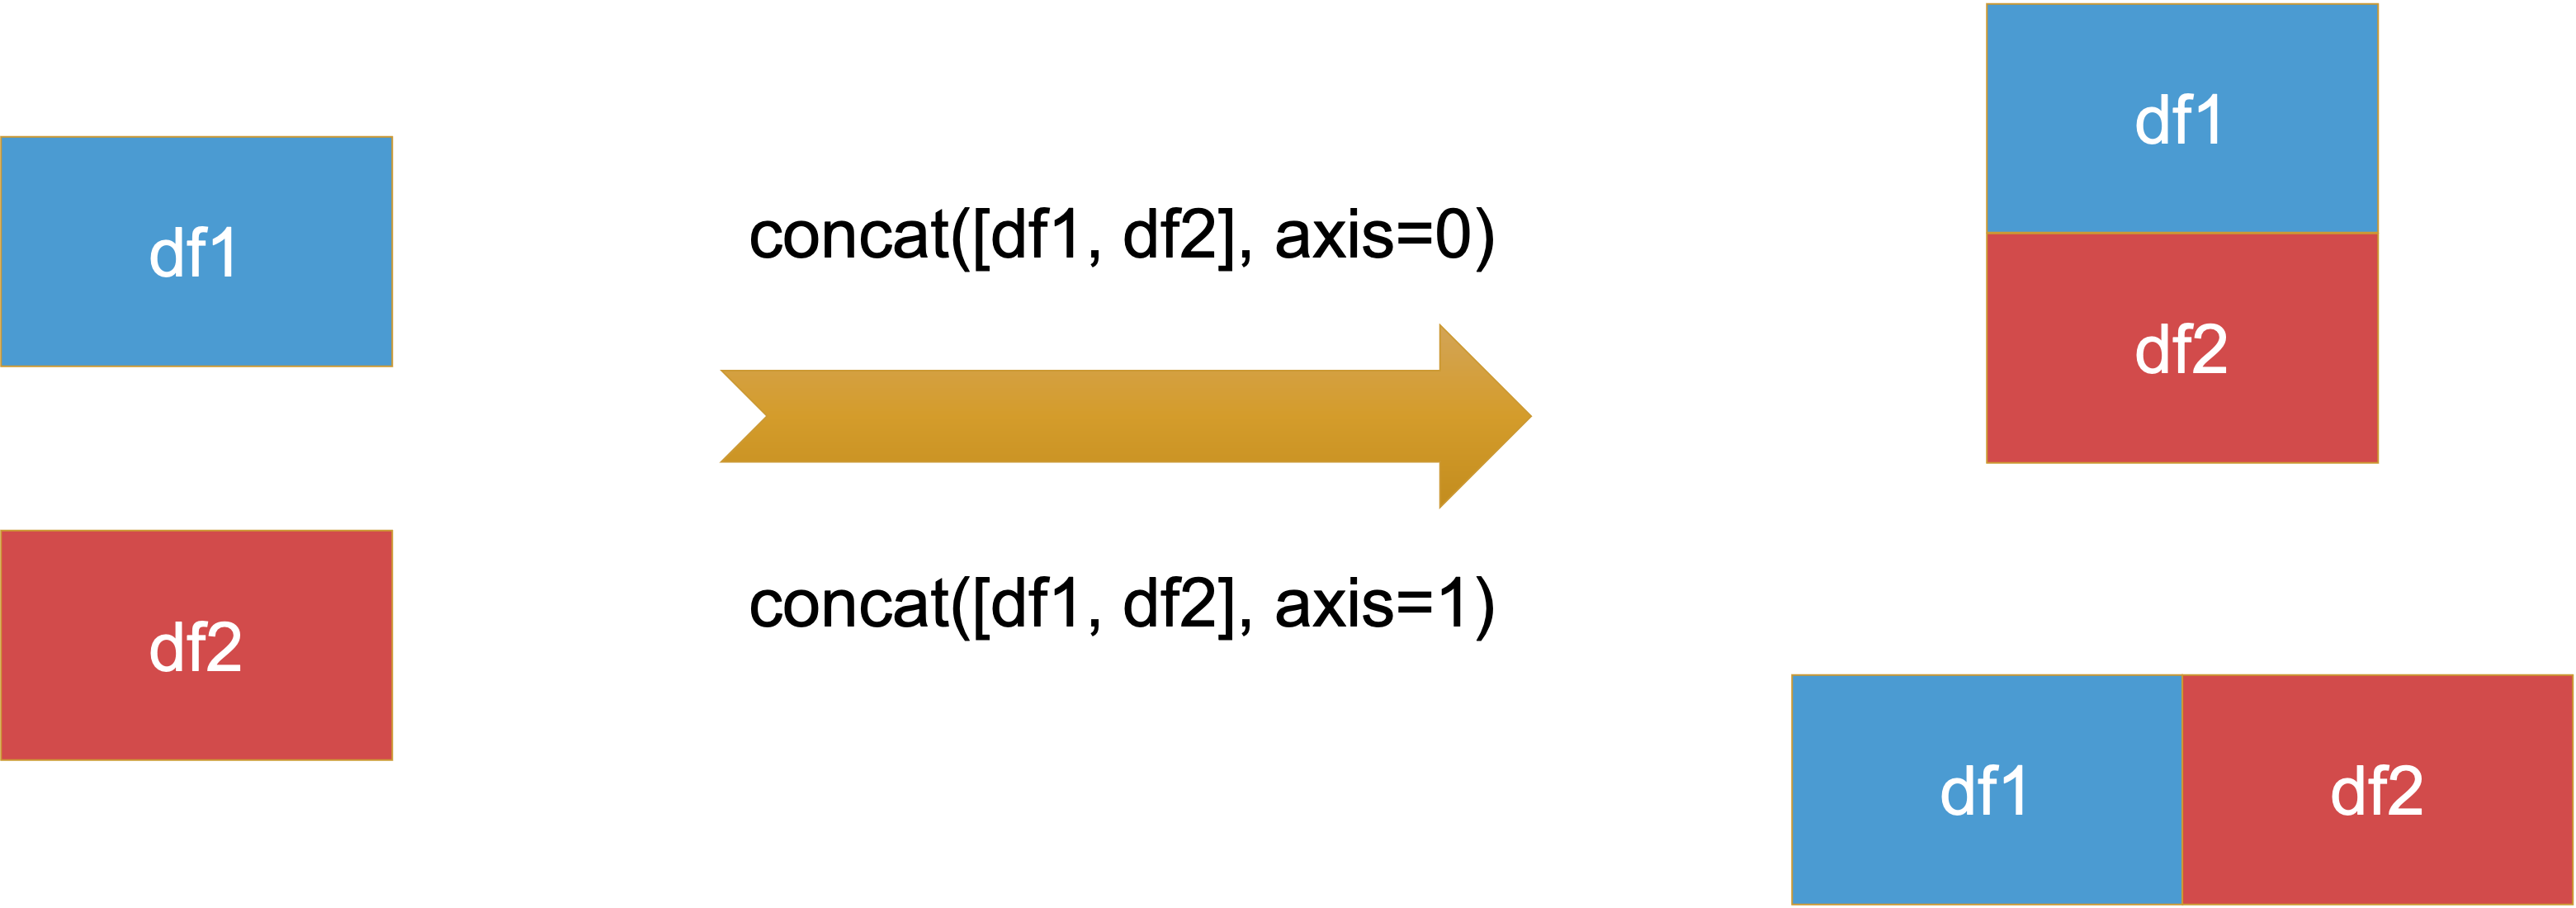

In [ ]:
# Create DataFrame A
data_a = {
    'EmployeeID': [1, 2, 3, 4, 7],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Sarah']
}
df_a = pd.DataFrame(data_a)

# Create DataFrame B
data_b = {
    'EmployeeID': [5, 8, 9],
    'Name': ['Lucia', 'Ali', 'Charlotte']
}
df_b = pd.DataFrame(data_b)

# Create DataFrame B
data_c = {
    'EmployeeID': [3, 4, 5, 6, 9],
    'Department': ['HR', 'IT', 'Finance', 'Marketing','IT']
}
df_c = pd.DataFrame(data_c)

In [ ]:
df_a

In [ ]:
df_b

In [ ]:
df_c

In [ ]:
df_d = pd.concat([df_a, df_b], axis=0)
df_d

It does not make sence to concate the columns in ```df_a``` and ```df_b```:

In [ ]:
df_e = pd.concat([df_a, df_b], axis=1)
df_e

### 5.9.2 Merging dataframes
`merge()` is also used to combine two DataFrames, but unlike `concat()`, which simply concatenates the DataFrames together keeping all infomration from both, `merge()` can have complex rules about which information from each DataFrame is included.

In fact, merge combines dataframes based on values in shared columns:

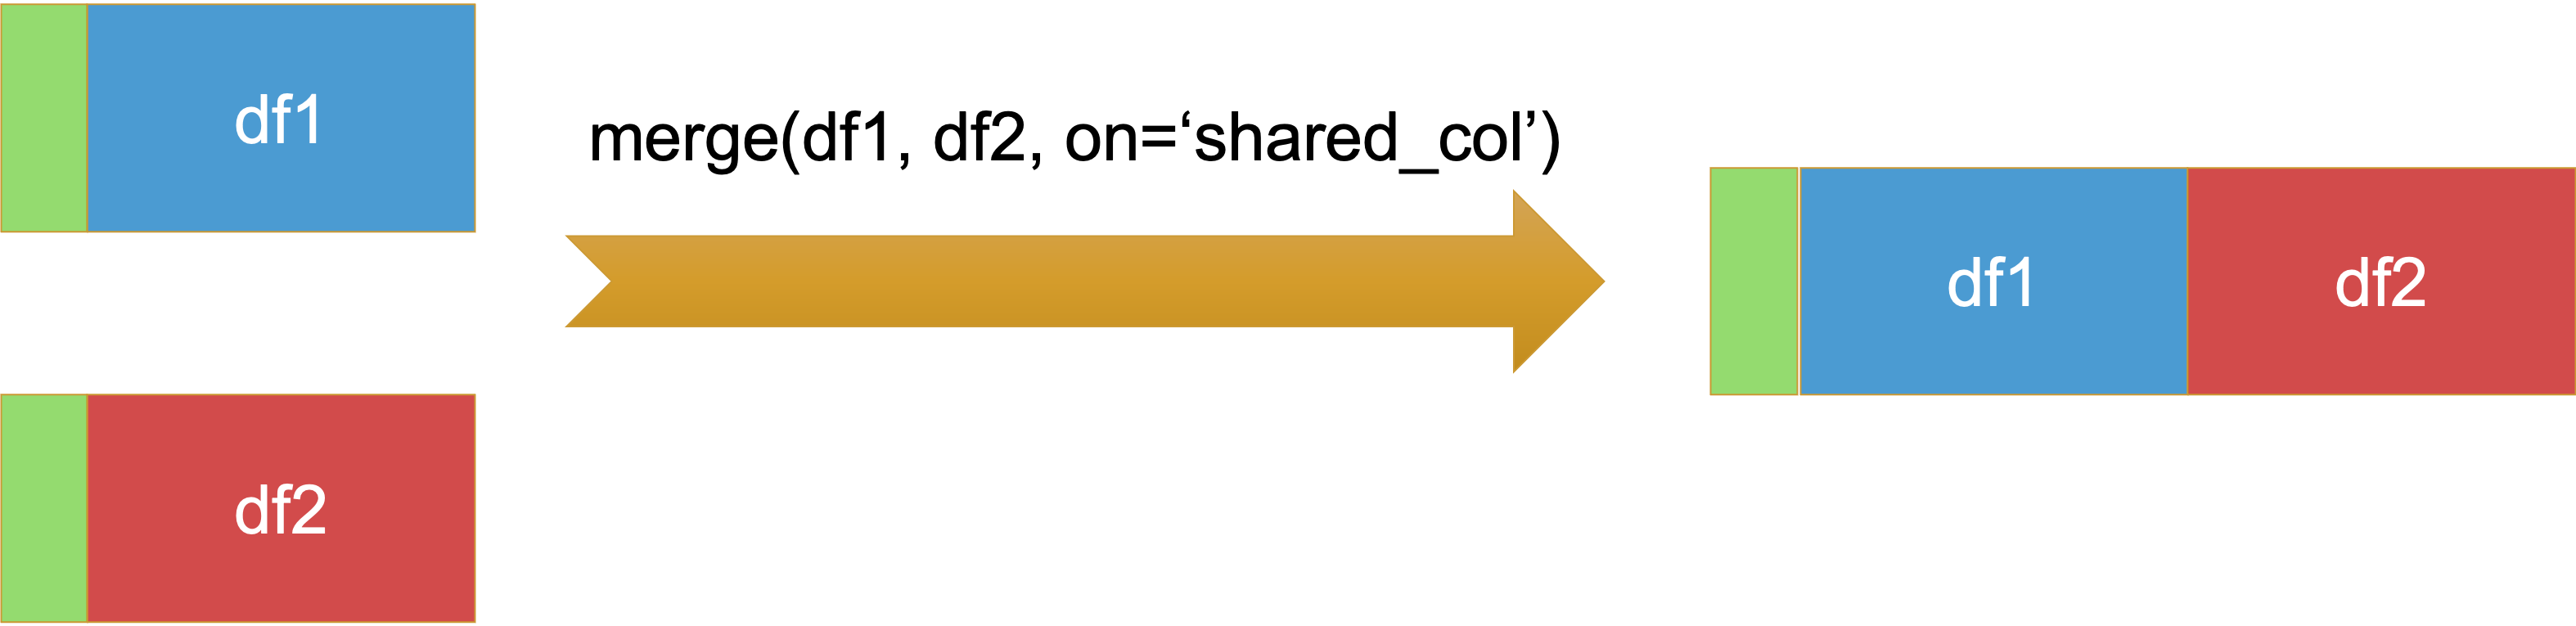

Specifically this is done by specifying the join method by specifying the `how=` optional parameter. See Exercise 5.1.1 to play with different join methods (note, there is also a new(ish) one called cross).

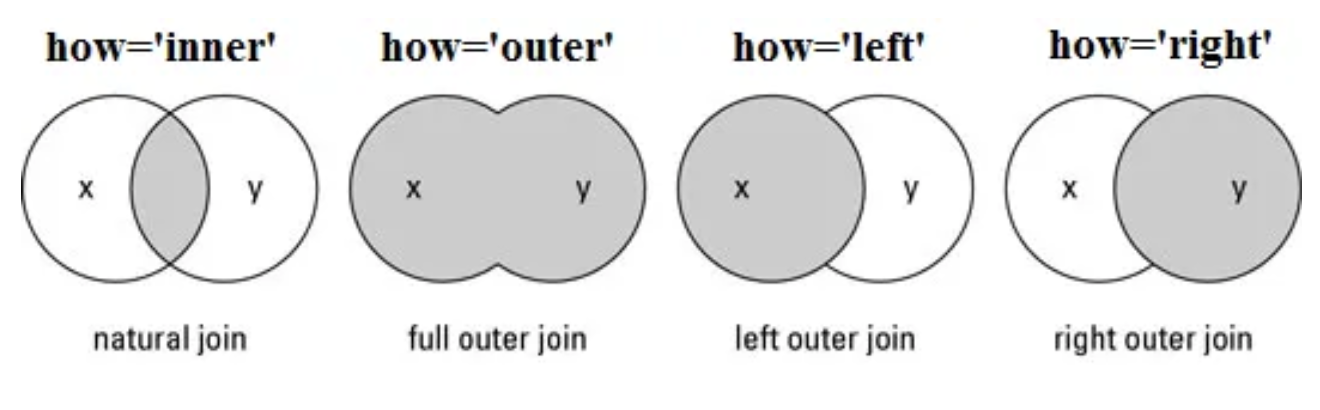

In [ ]:
df_a

In [ ]:
df_c

In [ ]:
df_i = pd.merge(df_a, df_c, on='EmployeeID', how='inner')
df_i

In [ ]:
df_o = pd.merge(df_a, df_c, on='EmployeeID', how='outer')
df_o

In [ ]:
df_l = pd.merge(df_a, df_c, on='EmployeeID', how='left')
df_l

In [ ]:
df_r = pd.merge(df_a, df_c, on='EmployeeID', how='right')
df_r

**Exercise 5.4** When running the following code, we are only left with two rows (Alice and Bryce could be merged on both id and subject_id, and Ayan and Betty too.) Look at the documentation and figure our why that is the case. Use the pandas documentation on ```merge``` and change the parameter responsible for the type of merge. This time merge by using all the rows (keys) from the first Dataframe (df1) and retrieve from the second dataframe only those that match.

In [ ]:
df1 = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayan'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})

df2 = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Brock', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})

pd.merge(df1, df2, on=['id','subject_id'])